<a href="https://colab.research.google.com/github/https-deeplearning-ai/tensorflow-1-public/blob/20_sep_2021_fixes/C3/W2/ungraded_labs/C3_W2_Lab_2_sarcasm_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000


In [ ]:
# sarcasm.json
!gdown --id 1xRU3xY5-tkiPGvlz5xBJ18_pHWSRzI4v

In [2]:
with open("./sarcasm.json", 'r') as f:
    datastore = json.load(f)

sentences = []
labels = []

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [4]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [5]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [6]:
# Need this block to get it to work with TensorFlow 2.x
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

# Build and Compile the Model

GlobalAveragePooling1D layer instead of Flatten after the Embedding. This adds the task of averaging over the sequence dimension before connecting to the dense layers. See a short demo of how this works using the snippet below. Notice that it gets the average over 3 arrays (i.e. (10 + 1 + 1) / 3 and (2 + 3 + 1) / 3 to arrive at the final output.


In [14]:
import tensorflow as tf

# Initialize a GlobalAveragePooling1D (GAP1D) layer
gap1d_layer = tf.keras.layers.GlobalAveragePooling1D()

# Define sample array
sample_array = np.array([[[10,2],[1,3],[1,1]]])

# Print shape and contents of sample array
print(f'shape of sample_array = {sample_array.shape}')
print(f'sample array: {sample_array}')

# Pass the sample array to the GAP1D layer
output = gap1d_layer(sample_array)

# Print shape and contents of the GAP1D output array
print(f'output shape of gap1d_layer: {output.shape}')
print(f'output array of gap1d_layer: {output.numpy()}')

shape of sample_array = (1, 3, 2)
sample array: [[[10  2]
  [ 1  3]
  [ 1  1]]]
output shape of gap1d_layer: (1, 2)
output array of gap1d_layer: [[4 2]]


This added computation reduces the dimensionality of the model as compared to using Flatten() and thus, the number of training parameters will also decrease. See the output of model.summary() below and see how it compares if you swap out the pooling layer with a simple Flatten()

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [8]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [9]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
625/625 - 1s - loss: 0.6687 - accuracy: 0.5757 - val_loss: 0.6016 - val_accuracy: 0.6706
Epoch 2/30
625/625 - 1s - loss: 0.4625 - accuracy: 0.8192 - val_loss: 0.3997 - val_accuracy: 0.8343
Epoch 3/30
625/625 - 1s - loss: 0.3294 - accuracy: 0.8711 - val_loss: 0.3654 - val_accuracy: 0.8426
Epoch 4/30
625/625 - 1s - loss: 0.2753 - accuracy: 0.8923 - val_loss: 0.3502 - val_accuracy: 0.8487
Epoch 5/30
625/625 - 1s - loss: 0.2386 - accuracy: 0.9089 - val_loss: 0.3530 - val_accuracy: 0.8501
Epoch 6/30
625/625 - 1s - loss: 0.2102 - accuracy: 0.9202 - val_loss: 0.3632 - val_accuracy: 0.8457
Epoch 7/30
625/625 - 1s - loss: 0.1889 - accuracy: 0.9302 - val_loss: 0.3514 - val_accuracy: 0.8545
Epoch 8/30
625/625 - 1s - loss: 0.1708 - accuracy: 0.9368 - val_loss: 0.3615 - val_accuracy: 0.8559
Epoch 9/30
625/625 - 1s - loss: 0.1539 - accuracy: 0.9456 - val_loss: 0.3745 - val_accuracy: 0.8536
Epoch 10/30
625/625 - 1s - loss: 0.1403 - accuracy: 0.9500 - val_loss: 0.3955 - val_accuracy: 0.8508

In [12]:

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [11]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(training_padded[0]))
print(training_sentences[2])
print(labels[2])

former <OOV> store clerk sues over secret 'black <OOV> for minority shoppers ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
mom starting to fear son's web series closest thing she will have to grandchild
1


In [12]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)


(10000, 16)


In [13]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [ ]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

In [14]:
sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

[[9.3411231e-01]
 [3.8510363e-05]]


## hyperparamaters tuning

In [4]:
vocab_size = int(10000/10)
embedding_dim = 128
max_length = 36
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000+ 1000

In [5]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [6]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [7]:
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 36, 128)           128000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 24)                3096      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 131,121
Trainable params: 131,121
Non-trainable params: 0
_________________________________________________________________


In [10]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
657/657 - 1s - loss: 0.5041 - accuracy: 0.7429 - val_loss: 0.4202 - val_accuracy: 0.8047
Epoch 2/30
657/657 - 1s - loss: 0.3802 - accuracy: 0.8266 - val_loss: 0.3967 - val_accuracy: 0.8173
Epoch 3/30
657/657 - 1s - loss: 0.3666 - accuracy: 0.8319 - val_loss: 0.4706 - val_accuracy: 0.7763
Epoch 4/30
657/657 - 1s - loss: 0.3632 - accuracy: 0.8336 - val_loss: 0.3995 - val_accuracy: 0.8175
Epoch 5/30
657/657 - 1s - loss: 0.3589 - accuracy: 0.8357 - val_loss: 0.4034 - val_accuracy: 0.8164
Epoch 6/30
657/657 - 1s - loss: 0.3587 - accuracy: 0.8344 - val_loss: 0.3990 - val_accuracy: 0.8177
Epoch 7/30
657/657 - 1s - loss: 0.3563 - accuracy: 0.8361 - val_loss: 0.4022 - val_accuracy: 0.8159
Epoch 8/30
657/657 - 1s - loss: 0.3556 - accuracy: 0.8377 - val_loss: 0.4082 - val_accuracy: 0.8136
Epoch 9/30
657/657 - 1s - loss: 0.3544 - accuracy: 0.8382 - val_loss: 0.4085 - val_accuracy: 0.8105
Epoch 10/30
657/657 - 1s - loss: 0.3545 - accuracy: 0.8373 - val_loss: 0.4015 - val_accuracy: 0.8121

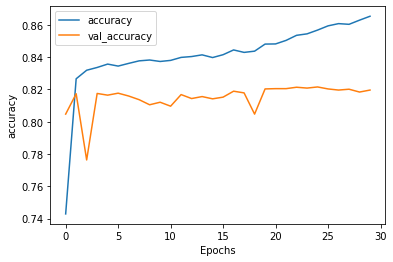

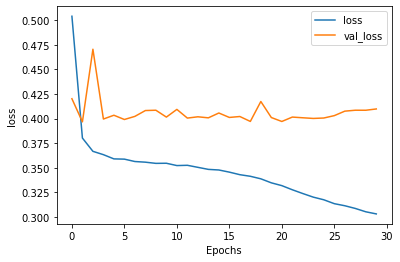

In [13]:
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")